## 1. Install Necessary Libraries

In [1]:
# Install required libraries
#!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from matplotlib.pyplot import figure
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

## 2. Import Data

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\nitya\\Desktop\\Notes\\T5\\TSMA\\CIA3\\data.csv", encoding='latin1')
df.shape

(342, 3)

In [3]:
df

,Id,Text,Rating
0,1,"I wish I could rate this app 0 stars, stop fak...",1
1,2,I ordered for the very first time from this ap...,1
2,3,The worst app ever!!!! Pathetic!! looks like s...,1
3,4,Not even a single star ! The Same unresponsive...,1
4,5,Tira app seems an interesting app however it i...,1
...,...,...,...
337,338,Fraud website never trust or buy anything from...,1
338,339,App is not sending otp for login.,1
339,340,Fast and easy best app',5
340,341,App doesn't work properly.,1


## 3. Exploratory Data Analysis

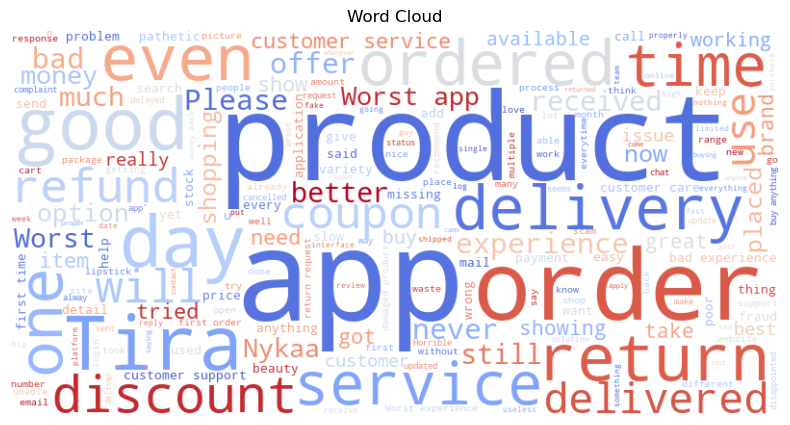

In [4]:
# Word Cloud with specified color palette
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(' '.join(df['Text']))
figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

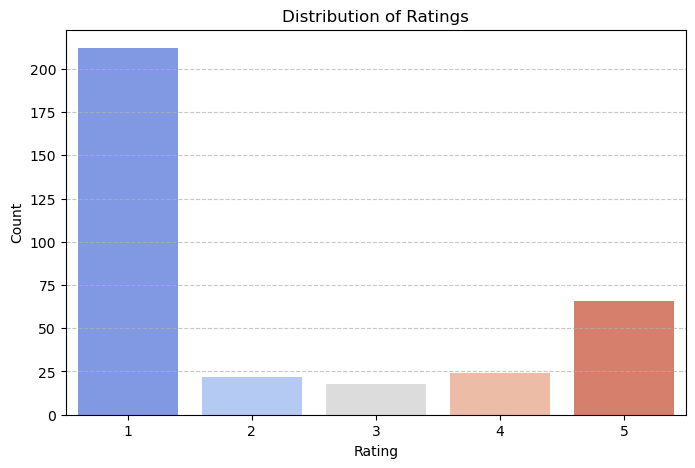

In [5]:
# Bar Chart of Ratings
figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='coolwarm')  # Using a consistent color palette
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines
plt.show()

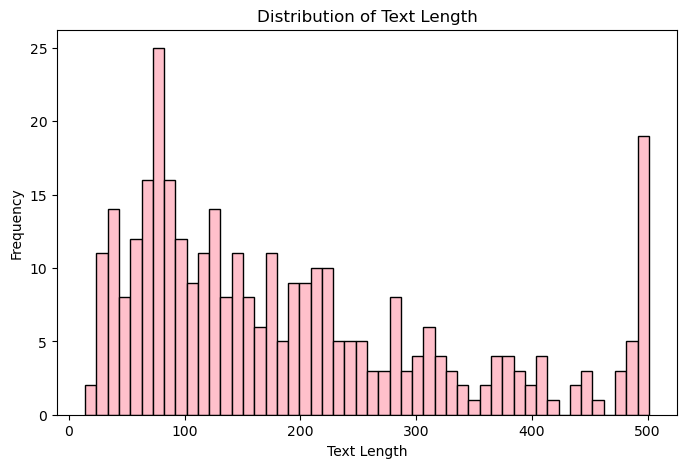

In [6]:
# Histogram of Text Length in Pink
plt.figure(figsize=(8, 5))
df['Text Length'] = df['Text'].apply(len)
plt.hist(df['Text Length'], bins=50, edgecolor='black', color='pink')  # Adjusting color to pink
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

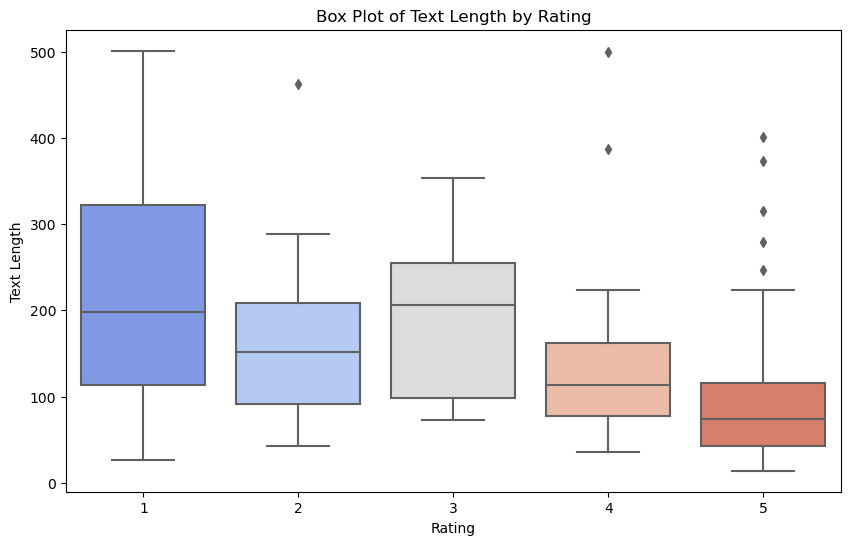

In [7]:
# Box Plot of Text Length by Rating with 'coolwarm' color palette
figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Text Length', data=df, palette='coolwarm')  # Using 'coolwarm' color palette
plt.title('Box Plot of Text Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Text Length')
plt.show()

## 4. Pre-Processing

In [8]:
# Preprocess the text data using CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['Text'])

dtm

<342x631 sparse matrix of type '<class 'numpy.int64'>'
	with 4243 stored elements in Compressed Sparse Row format>

## 5. LDA (Latent Dirichlet Allocation) Topic Modeling

In [9]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=35)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=35)

In [10]:
# Print the top words for each topic
feature_names = cv.get_feature_names_out()
num_top_words = 5

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: app, good, product, products, better
Topic #2: order, worst, days, app, time
Topic #3: products, app, good, tira, product
Topic #4: app, order, product, return, customer
Topic #5: coupon, bad, order, app, experience


In [11]:
# Assign topics to documents in the DataFrame
df['Topic'] = lda.transform(dtm).argmax(axis=1) + 1

df

,Id,Text,Rating,Text Length,Topic
0,1,"I wish I could rate this app 0 stars, stop fak...",1,498,4
1,2,I ordered for the very first time from this ap...,1,345,2
2,3,The worst app ever!!!! Pathetic!! looks like s...,1,487,2
3,4,Not even a single star ! The Same unresponsive...,1,358,4
4,5,Tira app seems an interesting app however it i...,1,499,4
...,...,...,...,...,...
337,338,Fraud website never trust or buy anything from...,1,126,3
338,339,App is not sending otp for login.,1,33,4
339,340,Fast and easy best app',5,23,3
340,341,App doesn't work properly.,1,26,4


## 6. Basic NLTK Processing

In [12]:
# Basic NLTK processing
example = df['Text'][50]
print(example)

Worst experience, Worst agents worst reply worst delivery. My product is delayed about 2 days. When I contact them they didn't take any action about that. They only told delivered soon or some thing like that. If you want product on correct estimated date plz order from another apps.


In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Worst',
 'experience',
 ',',
 'Worst',
 'agents',
 'worst',
 'reply',
 'worst',
 'delivery',
 '.']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Worst', 'NNP'),
 ('experience', 'NN'),
 (',', ','),
 ('Worst', 'NNP'),
 ('agents', 'NNS'),
 ('worst', 'JJS'),
 ('reply', 'VBP'),
 ('worst', 'JJ'),
 ('delivery', 'NN'),
 ('.', '.')]

## 7. VADER Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [15]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [16]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.293, 'neu': 0.625, 'pos': 0.082, 'compound': -0.9451}

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/342 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
# Now we have sentiment score and metadata
vaders.head(10)

,Id,neg,neu,pos,compound,Text,Rating,Text Length,Topic
0,1,0.143,0.806,0.051,-0.8550,"I wish I could rate this app 0 stars, stop fak...",1,498,4
1,2,0.177,0.755,0.067,-0.7906,I ordered for the very first time from this ap...,1,345,2
2,3,0.135,0.824,0.041,-0.8302,The worst app ever!!!! Pathetic!! looks like s...,1,487,2
3,4,0.086,0.914,0.000,-0.5848,Not even a single star ! The Same unresponsive...,1,358,4
4,5,0.200,0.645,0.155,-0.4929,Tira app seems an interesting app however it i...,1,499,4
5,6,0.162,0.708,0.130,-0.5719,Has the worst glitches and the customer suppor...,1,393,5
6,7,0.195,0.792,0.014,-0.9469,The app isn't working I ordered an eyeshadow p...,1,499,4
7,8,0.154,0.784,0.062,-0.8539,Horrible service!! Would never order nor recom...,1,474,3
8,9,0.181,0.786,0.033,-0.9247,"The service is trash and so insincere, i tried...",1,438,2
9,10,0.061,0.735,0.203,0.8979,Terrible customer support. Refund not received...,1,500,5


## 8. Sentiment Analysis with VADER

In [20]:
def get_sentiment(vaders):
    polarity = sia.polarity_scores(vaders)
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

vaders['Sentiment'] = vaders['Text'].apply(get_sentiment)
vaders.head()

,Id,neg,neu,pos,compound,Text,Rating,Text Length,Topic,Sentiment
0,1,0.143,0.806,0.051,-0.8550,"I wish I could rate this app 0 stars, stop fak...",1,498,4,Negative
1,2,0.177,0.755,0.067,-0.7906,I ordered for the very first time from this ap...,1,345,2,Negative
2,3,0.135,0.824,0.041,-0.8302,The worst app ever!!!! Pathetic!! looks like s...,1,487,2,Negative
3,4,0.086,0.914,0.000,-0.5848,Not even a single star ! The Same unresponsive...,1,358,4,Negative
4,5,0.200,0.645,0.155,-0.4929,Tira app seems an interesting app however it i...,1,499,4,Negative


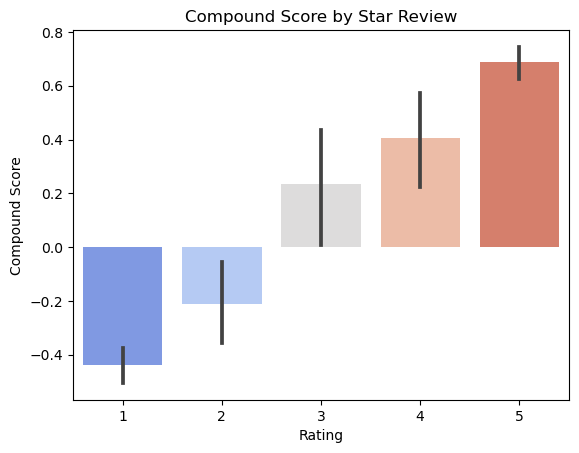

In [21]:
# Barplot for Compound Score by Star Review
ax = sns.barplot(data=vaders, x='Rating', y='compound', palette='coolwarm')  # Using a consistent color palette
ax.set_title('Compound Score by Star Review')
ax.set_xlabel('Rating')
ax.set_ylabel('Compound Score')
plt.show()

Reviews with a 1-star rating exhibit a lower compound score (negative), while those with a 5-star rating demonstrate a higher compound score (positive).

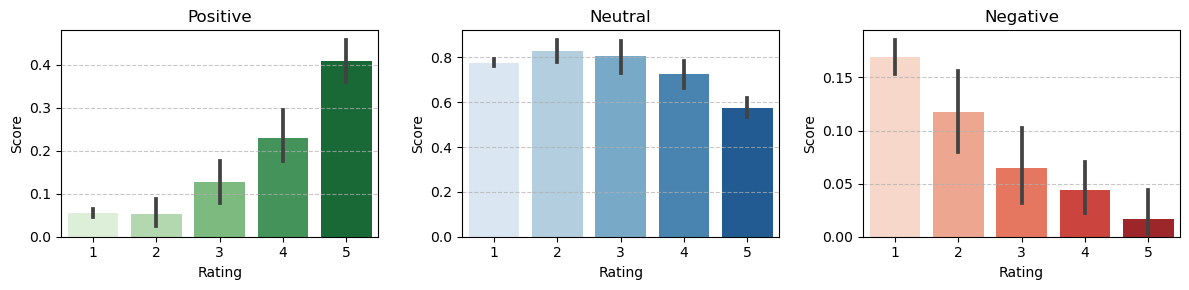

In [22]:
# Barplots for Positive, Neutral, Negative
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], palette='Greens')  # Using a different color palette
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1], palette='Blues')  # Using a different color palette
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2], palette='Reds')  # Using a different color palette
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
for ax in axs:
    ax.set_xlabel('Rating')
    ax.set_ylabel('Score')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Positive Graph: Reviews with a 5-star rating tend to contain predominantly positive words with a high the score.

- Neutral Graph: Neutral words are distributed evenly across reviews with various ratings.

- Negative Graph: In reviews with a 1-star rating, negative words are most frequently used.

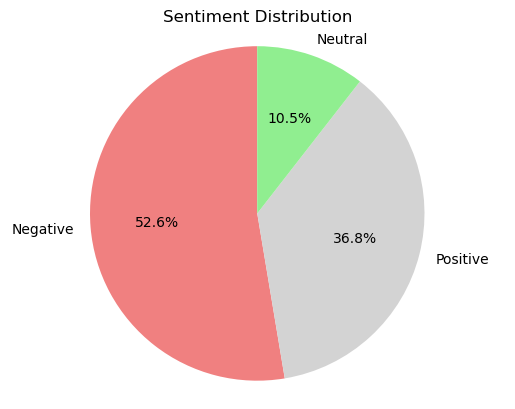

In [23]:
# Plot a pie chart of the sentiment distribution
sentiment_distribution = vaders['Sentiment'].value_counts(normalize=True)
fig, ax = plt.subplots()
ax.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgrey', 'lightgreen'])  # Using a custom color palette
ax.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

In [24]:
# Explore top texts for specific ratings based on sentiment scores
vaders.query('Rating == 5').sort_values('pos', ascending=False)['Text'].values[0]

"Good Support for Best Price'"

In [25]:
# Explore top texts for specific ratings based on sentiment scores
vaders.query('Rating == 1').sort_values('neg', ascending=False)['Text'].values[0]

"Worst app... Customer service is pathetic and no refund policy. I hate thise app'"

In [26]:
vaders

,Id,neg,neu,pos,compound,Text,Rating,Text Length,Topic,Sentiment
0,1,0.143,0.806,0.051,-0.8550,"I wish I could rate this app 0 stars, stop fak...",1,498,4,Negative
1,2,0.177,0.755,0.067,-0.7906,I ordered for the very first time from this ap...,1,345,2,Negative
2,3,0.135,0.824,0.041,-0.8302,The worst app ever!!!! Pathetic!! looks like s...,1,487,2,Negative
3,4,0.086,0.914,0.000,-0.5848,Not even a single star ! The Same unresponsive...,1,358,4,Negative
4,5,0.200,0.645,0.155,-0.4929,Tira app seems an interesting app however it i...,1,499,4,Negative
...,...,...,...,...,...,...,...,...,...,...
337,338,0.273,0.606,0.122,-0.5404,Fraud website never trust or buy anything from...,1,126,3,Negative
338,339,0.000,1.000,0.000,0.0000,App is not sending otp for login.,1,33,4,Neutral
339,340,0.000,0.297,0.703,0.7964,Fast and easy best app',5,23,3,Positive
340,341,0.000,1.000,0.000,0.0000,App doesn't work properly.,1,26,4,Neutral


In [27]:
# Create a function to generate and plot word clouds
def plot_word_cloud(sentiment):
    # Filter the dataset based on the specified sentiment
    filtered_data = vaders[vaders['Sentiment'] == sentiment]

    # Combine the text from the filtered data into a single string
    text = ' '.join(filtered_data['Text'])

    # Generate a word cloud with 'coolwarm' color palette
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

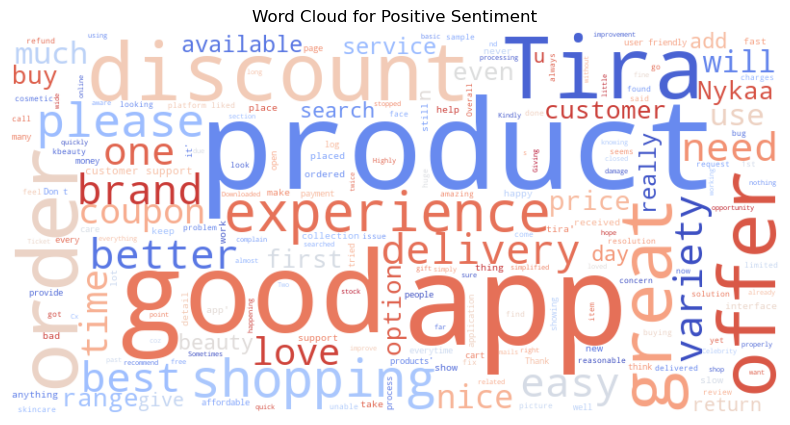

In [28]:
# Plot word cloud for positive sentiment
plot_word_cloud('Positive')

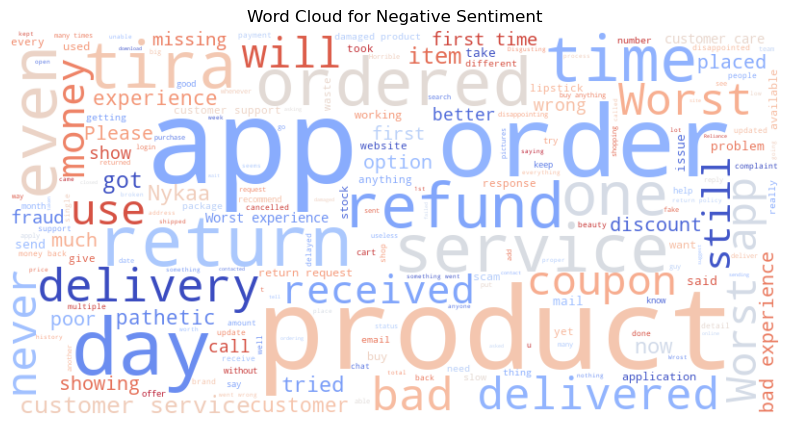

In [29]:
# Plot word cloud for negative sentiment
plot_word_cloud('Negative')